In [321]:
#
#import all the necessary dependencies
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Read the Image, Grayscale, and Blur

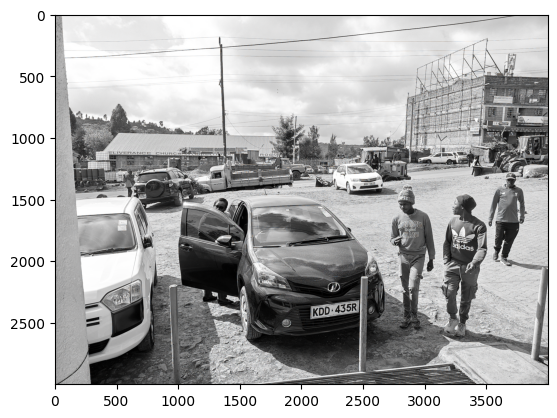

In [322]:
img= cv2.imread('./src/IMG_20220920_091525.jpg')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BAYER_BG2BGR))

## 2. Apply filters and find edges for localization

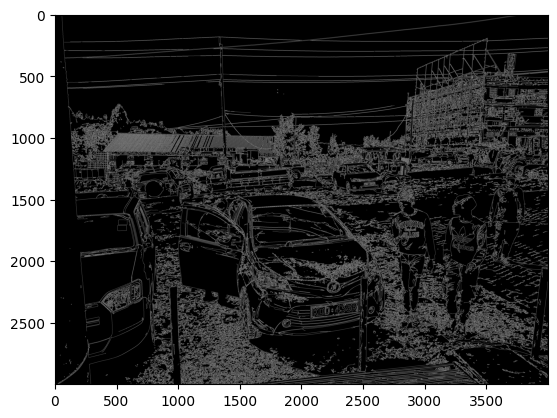

In [323]:
bfilter= cv2.bilateralFilter(gray, 12,17,17) ## reduce the noise in the image
edged= cv2.Canny(bfilter, 30, 250) # Detect edges
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [324]:
keypoints= cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= imutils.grab_contours(keypoints)
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [325]:
location= None
for contour in contours:
    approx= cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location=approx
        break

In [326]:
location

array([[[2469, 2321]],

       [[2074, 2369]],

       [[2071, 2475]],

       [[2461, 2420]]], dtype=int32)

In [327]:
mask = np.zeros(gray.shape, np.uint8)
new_image= cv2.drawContours(mask, [location],0,255,-1)
new_image= cv2.bitwise_and(img,img, mask=mask)

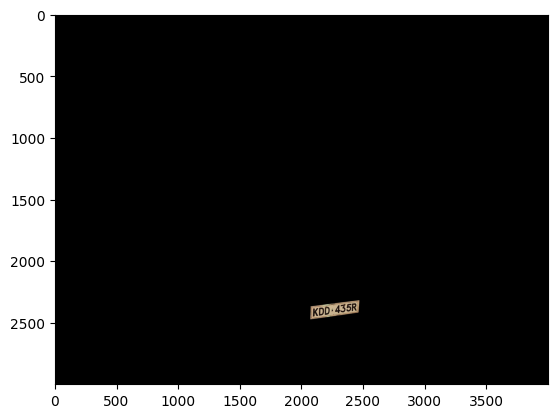

In [328]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

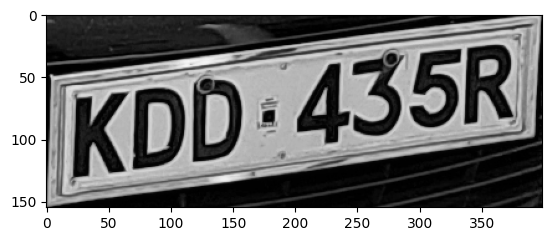

In [329]:
#
#Crop out the image section
(x,y)= np.where(mask==255)
(x1,y1)= (np.min(x), np.min(y))
(x2,y2)=(np.max(x), np.max(y))
cropped_image= gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4.Read the text within the image using Easy OCR

In [330]:
reader= easyocr.Reader(['en'])
result= reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[191.0758553927899, 28.186862503228426],
   [385.7462836190251, 10.152059936883216],
   [387.9241446072101, 98.81313749677157],
   [193.25371638097488, 116.84794006311678]],
  '435R',
  0.9915525410092425),
 ([[12.145921408021753, 51.17338346251529],
   [198.74893208030358, 36.15684116983194],
   [199.85407859197824, 123.82661653748471],
   [13.251067919696416, 138.84315883016805]],
  'KDD:',
  0.975180983543396)]

## 5. Render Result

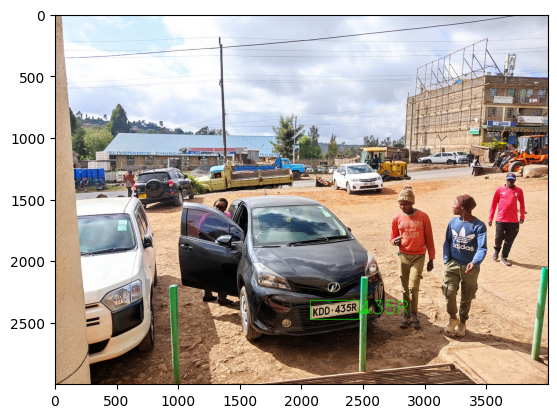

In [333]:
text= result[0][-2]
font= cv2.FONT_HERSHEY_SIMPLEX
res= cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace= font, fontScale=5, color=(0,255,0), thickness=4, lineType=cv2.LINE_AA)
res= cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),4)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))